<a href="https://colab.research.google.com/github/hilwaadzilatin/Pejuang_Data_3/blob/main/Mini_Project_Kelas_Dasar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Television Brands E-commerce Dataset**



##Latar Belakang Dataset

Terdapat berbagai jenis layar dengan sistem operasi berbeda yang ditawarkan oleh beberapa produsen televisi dengan harga bersaing. Dataset ini dapat digunakan untuk mengeksplorasi skenario pasar saat ini untuk televisi. 

## Pertanyaan Analisis

1. Bagaimana permintaan untuk berbagai jenis televisi dan sejumlah pemain di pasar?
2. Manakah 5 merek televisi teratas?
3. Merek mana yang memiliki jumlah produk televisi terbanyak?
4. Apakah televisi dengan penilaian yang lebih tinggi menyebabkan harganya lebih mahal?
5. Berapa harga jual rata-rata berdasarkan merek?

##EDA (Exploratory Data Analysis)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('/content/TV_Final.csv')
data.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3


## Data Preparation

In [6]:
data.shape

(912, 7)

In [7]:
data.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3


In [8]:
data['Brand']=data['Brand'].replace(['Samsung'],'SAMSUNG')

In [9]:
data.dtypes

Brand                object
Resolution           object
Size                  int64
Selling Price         int64
Original Price        int64
Operating System     object
Rating              float64
dtype: object

In [10]:
data.nunique()

Brand                58
Resolution            5
Size                 27
Selling Price       515
Original Price      455
Operating System      7
Rating               25
dtype: int64

In [11]:
data['Brand'].nunique()

58

In [12]:
data['Resolution'].unique()

array(['Ultra HD LED', 'QLED Ultra HD', 'HD LED', 'Full HD LED',
       'HD Plasma'], dtype=object)

In [13]:
data['Operating System'].unique()

array(['VIDAA', 'Android', 'Linux', nan, 'Tizen', 'WebOS', 'HomeOS',
       'FireTV OS'], dtype=object)

In [14]:
data.isnull().sum()

Brand                 0
Resolution            0
Size                  0
Selling Price         0
Original Price        0
Operating System     11
Rating              220
dtype: int64

## Data Visualization

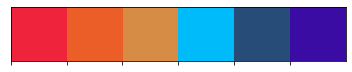

In [15]:
#color palette for this notebook
colors = ["#EF233C","#eb5e28","#d68c45","#00bbf9","#274c77","#3a0ca3"]
palette = sns.color_palette(palette = colors)

sns.palplot(palette, size =1)
plt.show()

In [16]:
# jumlah produk berdasarkan resolusi
data['Brand'].groupby(data['Resolution']).count().sort_values(ascending=False)

Resolution
Ultra HD LED     399
HD LED           229
Full HD LED      220
QLED Ultra HD     60
HD Plasma          4
Name: Brand, dtype: int64

Tampaknya ada permintaan yang lebih tinggi untuk TV Digital, terutama TV LED karena tiga kategori teratas diisi oleh semua jenis TV LED yang berbeda.

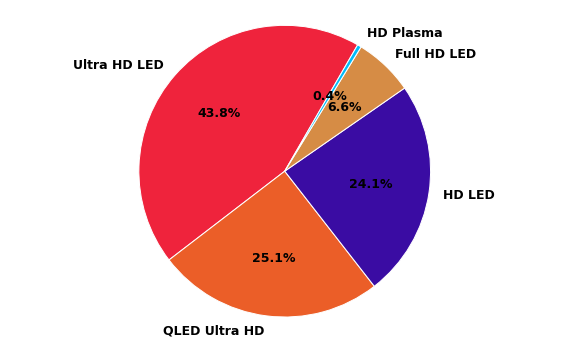

In [21]:
# Distribusi Jenis Perangkat

labels = 'Ultra HD LED', 'QLED Ultra HD', 'HD LED', 'Full HD LED','HD Plasma'
sizes = [399,229,220,60,4]
fig, ax = plt.subplots(figsize=(10,6))
fig.set_facecolor('white')
ax.pie(sizes, labels=labels, colors=["#EF233C","#eb5e28","#3a0ca3","#d68c45","#00bbf9"],autopct='%1.1f%%', startangle=60,textprops={'color':'black','weight':'bold','fontsize':12.5})
ax.axis('equal')
plt.show()

TV LED ultra HD tampaknya lebih diminati, karena lebih dari 40% produk yang dikategorikan sebagai 'Televisi' di situs web adalah jenis ini

In [22]:
#Manakah 5 brand televisi teratas?
data['Brand'].groupby(data['Brand']).count().sort_values(ascending=False).iloc[:5]

Brand
SAMSUNG      146
LG           122
SONY          62
TCL           44
Panasonic     30
Name: Brand, dtype: int64

Merek 'Samsung' jelas menawarkan jumlah maksimum Televisi di pasar diikuti oleh LG. Sedangkan merek seperti Sony, TCL, dan Panasonic menawarkan jumlah produk yang cukup sedikit jika dibandingkan dengan kedua merek tersebut.

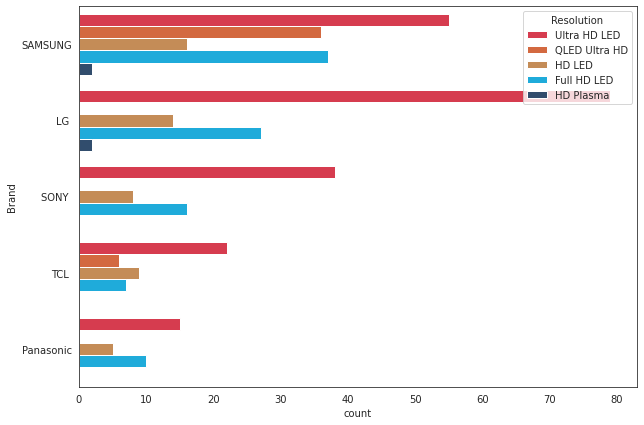

In [23]:
#Merek dan Resolusi
sns.set_style('white')
plt.figure(figsize=(10,7))
sns.countplot(y="Brand", hue="Resolution", data=data, palette=colors,order=data["Brand"].value_counts().iloc[:5].index)

Sementara Samsung menawarkan produk di semua kategori Resolusi, LG tidak menawarkan tipe 'QLED Ultra HD'.

In [24]:
#Apakah TV dengan penilaian lebih tinggi menyebabkan harga lebih mahal atau TV mahal dari merek terkenal memiliki peringkat lebih tinggi yang menunjukkan kualitas premium?
round(data.groupby('Brand')['Rating'].mean().sort_values(ascending=False),1)

Brand
SONY                4.5
OnePlus             4.4
Hisense             4.4
Haier               4.4
Vu                  4.4
TOSHIBA             4.4
MOTOROLA            4.3
Mi                  4.3
Compaq              4.3
Onida               4.3
Onix                4.3
Thomson             4.3
Dektron             4.3
KODAK               4.3
iFFALCON by TCL     4.3
LG                  4.3
realme              4.3
MarQ by Flipkart    4.3
Nokia               4.3
SAMSUNG             4.3
Coocaa              4.2
Blaupunkt           4.2
Weston              4.2
TCL                 4.2
Sanyo               4.2
Infinix             4.2
Intex               4.2
Panasonic           4.2
IMPEX               4.1
Croma               4.1
Sansui              4.1
Micromax            4.1
PHILIPS             4.1
HUIDI               4.1
CloudWalker         4.1
Lloyd               4.1
Candes              4.1
JVC                 4.0
DETEL               4.0
LumX                4.0
Acer                3.9
RGL       

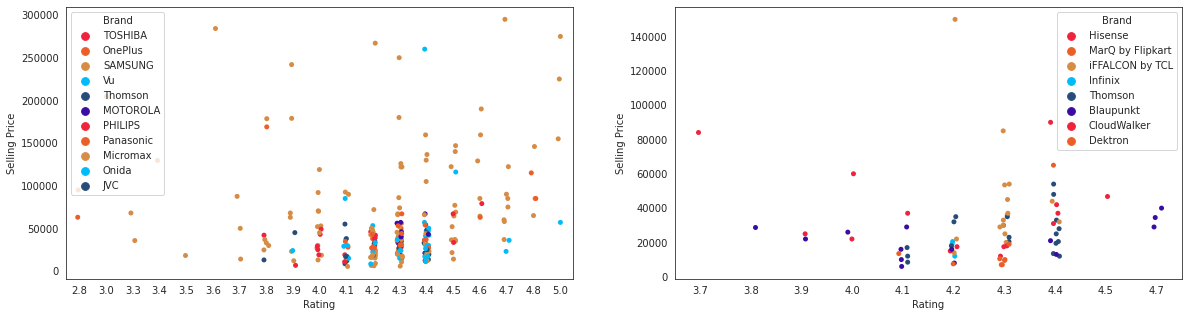

In [25]:
# Rating vs Harga Jual
#filter by Known Brands
list1 = ["SONY","OnePlus","Haier","Vu","TOSHIBA","MOTOROLA","Mi","Compaq","Onida","Thomson",
        "KODAK","LG","realme","SAMSUNG","Nokia","Panasonic","Sansui","Micromax","PHILIPS","Samsung","JVC"]

list2 = ["Hisense","Thomson","Onix","KODAK","Dektron","iFFALCON by TCL","MarQ by Flipkart","Nokia","Coocaa","Blaupunkt","Weston","TCL",
        "Infinix","Sanyo","Intex","IMPEX","Croma","HUIDI","CloudWalker","Lloyd", 
        "Candes","Detel","LumX"]
series1 = data["Brand"].isin(list1)
series2 = data["Brand"].isin(list2)
data_f1= data[series1]
data_f2= data[series2]
fig, axs = plt.subplots(ncols=2,figsize=(20,5))
ax1 = sns.stripplot(x="Rating", y="Selling Price", data=data_f1,hue="Brand", palette=colors,ax=axs[0])
ax2 = sns.stripplot(x="Rating", y="Selling Price", data=data_f2,hue="Brand", palette=colors,ax=axs[1])

Plot pertama di sebelah kiri menunjukkan merek-merek terkenal dengan TV mahal dan peringkatnya, sedangkan yang kedua di sebelah kanan menunjukkan merek-merek baru dan kurang terkenal dengan harga jual dan peringkatnya. Dari plot kedua, bahkan merek yang kurang dikenal memiliki peringkat lebih tinggi >4.0. Jadi, ada kemungkinan bahwa peringkat tidak terlalu dipengaruhi oleh nama merek saja.

In [26]:
import altair as alt
alt.Chart(data).mark_point(filled=True,size=40).encode(
    x='Original Price',
    y='Selling Price',
    color='Brand',
    tooltip=['Brand', 'Selling Price', 'Original Price']
).interactive()

alt.Chart(...)

**Harga Jual Rata-rata  Berdasarkan Resolusi**

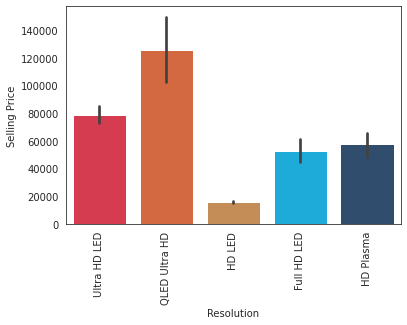

In [27]:
sns.barplot(x=data['Resolution'], y=data['Selling Price'],palette=colors)
plt.xticks(rotation="vertical")
plt.show()

**Harga Jual Rata-rata Berdasarkan Merek**

In [28]:
# Brandwise Mean Selling prices
data.groupby('Brand')['Selling Price'].mean().sort_values(ascending=False).apply(np.ceil)

Brand
Sharp               149672.0
SAMSUNG             107035.0
LG                   96915.0
Hisense              89796.0
SONY                 89343.0
TCL                  55799.0
iFFALCON by TCL      54235.0
Panasonic            53494.0
Akai                 52003.0
OnePlus              47376.0
Vu                   46650.0
Compaq               45999.0
Sanyo                45499.0
Weston               43390.0
Oxygen               40327.0
Nokia                38863.0
TOSHIBA              38853.0
MOTOROLA             38399.0
Sansui               37672.0
Haier                36617.0
AISEN                35463.0
BPL                  34618.0
Onix                 34217.0
Lloyd                34162.0
PHILIPS              34114.0
JVC                  32497.0
CloudWalker          32332.0
Acer                 31665.0
Mi                   30788.0
Power Guard          30510.0
Onida                29708.0
IMPEX                28820.0
Intex                27341.0
Micromax             26870.0
Thomson 

In [29]:
#filter dataframe
data_p1=data_f1[(data_f1["Selling Price"] >=10000) & (data_f1["Selling Price"] <= 100000)]
data_p1.iloc[:2]

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
5,OnePlus,HD LED,32,15999,19999,Android,4.3


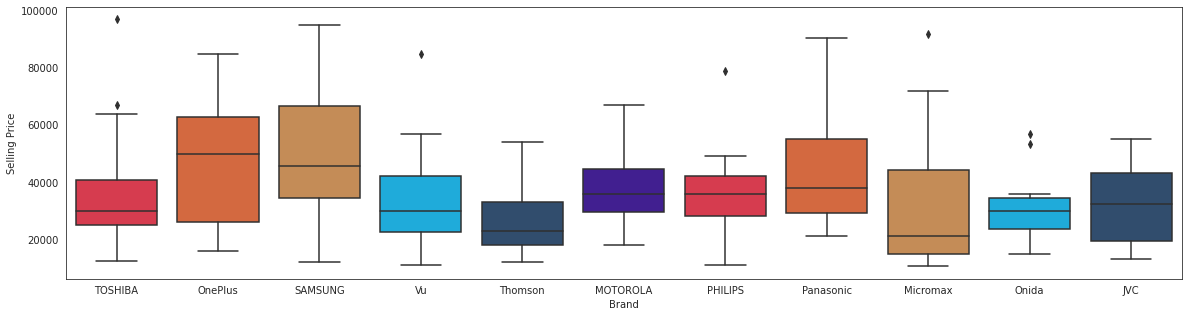

In [35]:
#Plot kotak untuk menunjukkan harga jual rata-rata
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.boxplot(x="Brand", y="Selling Price", data=data_p1,palette=colors)

Jelas bahwa dari merek-merek terkenal Televisi SAMSUNG adalah yang paling mahal sedangkan Televisi Micromax adalah yang paling terjangkau.

In [32]:
#filter dataframe
data_p2=data_f2[(data_f2["Selling Price"] >=10000) & (data_f2["Selling Price"] <= 100000)]
data_p2.iloc[:2]

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
11,Hisense,Ultra HD LED,55,36999,49990,Android,4.4
15,Hisense,Ultra HD LED,70,89999,119990,Android,4.4


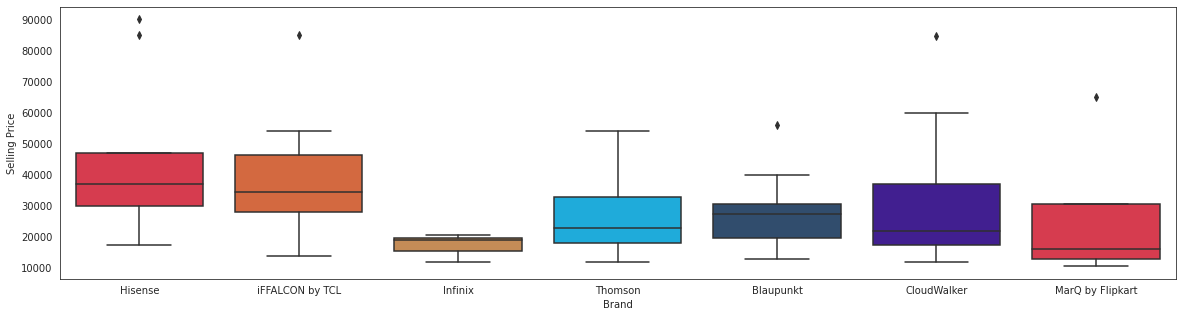

In [33]:
#Plot kotak untuk menunjukkan harga jual rata-rata
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.boxplot(x="Brand", y="Selling Price", data=data_p2,palette=colors)

Dari merek baru dan yang akan datang, Televisi Hisense adalah yang paling mahal sementara MarQ oleh Flipkart Televisi adalah yang paling terjangkau.

**Harga jual rata-rata menurut Sistem Operasi**

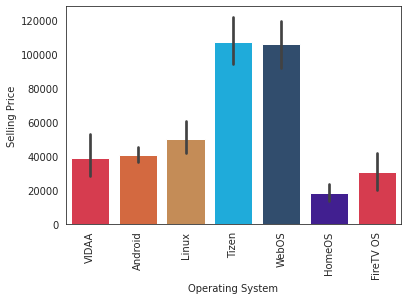

In [34]:
sns.barplot(x=data['Operating System'], y=data['Selling Price'],palette=colors)
plt.xticks(rotation="vertical")
plt.show()

Dari grafik di atas, jelas bahwa TV dengan Tizen dan WebOS paling mahal, sedangkan TV HomeOS adalah yang paling terjangkau.

**Kesimpulan:**

1. Ada permintaan yang jelas untuk berbagai jenis televisi melihat jumlah produk yang ditawarkan oleh 58 merek unik di pasar.
2. Merek seperti SAMSUNG, LG, TOSHIBA tampaknya cukup populer tetapi ada sejumlah merek yang akan datang dengan produk yang kompetitif di pasar.
3. SAMSUNG memiliki jumlah produk terbanyak yaitu televisi.
4. Tidak ada korelasi yang jelas antara harga jual dan peringkat yang lebih tinggi untuk televisi.
5. Harga Jual Rata-Rata Menurut Merk - Sharp, SAMSUNG, dan LG adalah merk termahal.